# **Estadística inferencial vs. estadística descriptiva**

Mientras que la **estadística descriptiva** sirve para *entender las propiedades de un dataset* de observaciones, la **estadística inferencial** permite inferir propiedades más allá de ese dataset, es decir, de una población entera. Pero, ¿cómo es que se logra inferir propiedades de algo más allá del alcance de un conjunto de datos? Para que esto debemos tener bases sólidas de estadística descriptiva.

¿***Qué es una población y una muestra estadística***?

Supongamos, por ejemplo, que tenemos datos sobre la edad en la que los desarrolladores de software de Colombia consiguieron su primer empleo, tendríamos una muestra.

¿Sería correcto decir que el promedio de esa muestra es el promedio la población total de developers de Colombia? No.

Y es aquí donde se hace útil la **estadística inferencial**. Vamos a inferir, a partir de una muestra, las características de una población total.


Entonces, las diferencias entre población y muestra son:


**Población** → Es el grupo total que quieres describir.

**Muestra** → Es una fracción representativa de la población.



Veamos un ejemplos para que quede más claro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# StandardScaler(): Normaliza los datos restando el promedio y dividiendo sobre la desviación estándar en cada variable (Z-Score).
from sklearn.preprocessing import StandardScaler

# **Cargamos el Dataset iris es un conjunto de datos que tiene atributos de un tipo de flor que tienen 3 especies**

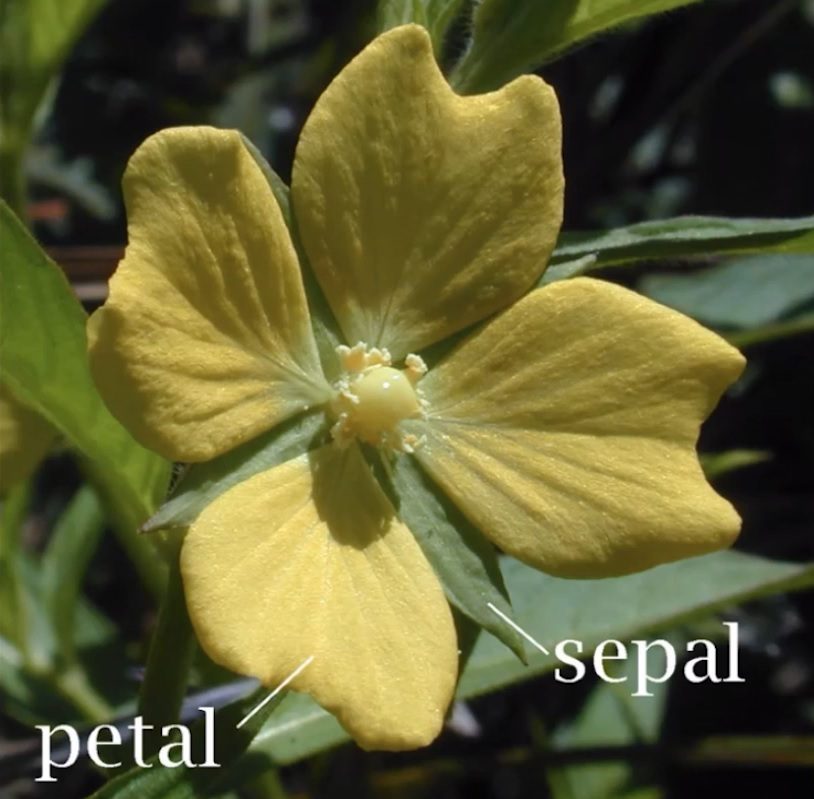



In [3]:
iris = sns.load_dataset('iris')
#Siempre es buena idea ver algunas filas de nuestro DataFrame.
iris.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species
119,6.0,2.2,5.0,1.5,virginica
62,6.0,2.2,4.0,1.0,versicolor
16,5.4,3.9,1.3,0.4,setosa
46,5.1,3.8,1.6,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
138,6.0,3.0,4.8,1.8,virginica
74,6.4,2.9,4.3,1.3,versicolor
90,5.5,2.6,4.4,1.2,versicolor


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.shape

(150, 5)

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
iris.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [8]:
# Puede utilizar el método sample para visualizar registros de forma aleatoria:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,virginica
121,5.6,2.8,4.9,2.0,virginica
55,5.7,2.8,4.5,1.3,versicolor
34,4.9,3.1,1.5,0.2,setosa
132,6.4,2.8,5.6,2.2,virginica


In [9]:
#Ahora vamos a hacer el resumen estadístico de nuestro dataset total.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Podemos ver cada columna independientemente:
iris.sepal_width.describe()

,sepal_width
count,150.000000
mean,3.057333
std,0.435866
min,2.000000
25%,2.800000
50%,3.000000
75%,3.300000
max,4.400000


In [11]:
# Para obtener el resumen estadístico de un tipo de dato particular podemos utilizar el kwarg include:
iris.describe(include = 'object')

,species
count,150
unique,3
top,setosa
freq,50


In [12]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [13]:
# Conteo de los niveles en las columnas categóricas
cols_cat = ['species']

for col in cols_cat:
  print(f'Columna {col}: {iris[col].nunique()} niveles')

Columna species: 3 niveles


<Axes: xlabel='species'>

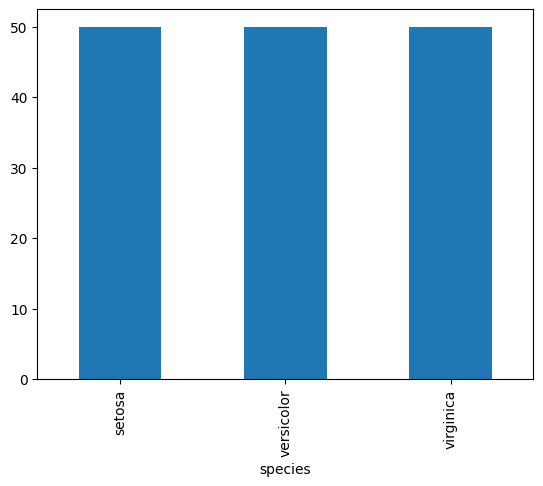

In [14]:
iris['species'].value_counts().plot(kind = 'bar')

Este pequeño resumen nos da una idea de los datos que tenemos. **Pero únicamente es para esta muestra**.

¿Qué podríamos hacer si quisiéramos conocer los parámetros estadísticos de la población total de ese tipo de flores?

<Axes: xlabel='sepal_length', ylabel='petal_length'>

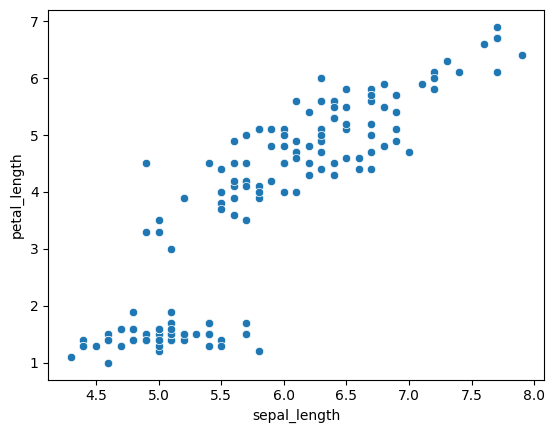

In [15]:
# Diagramas de dispersion scatterplot
# Mas informacion de este tipo de diagramas https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.scatterplot(data=iris, x = 'sepal_length', y = 'petal_length')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

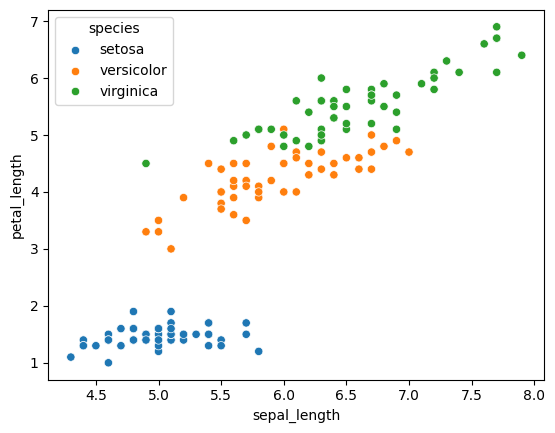

In [16]:
# Grafique los datos segmentandolos por especie

sns.scatterplot(data=iris, x = 'sepal_length', y = 'petal_length', hue = 'species')

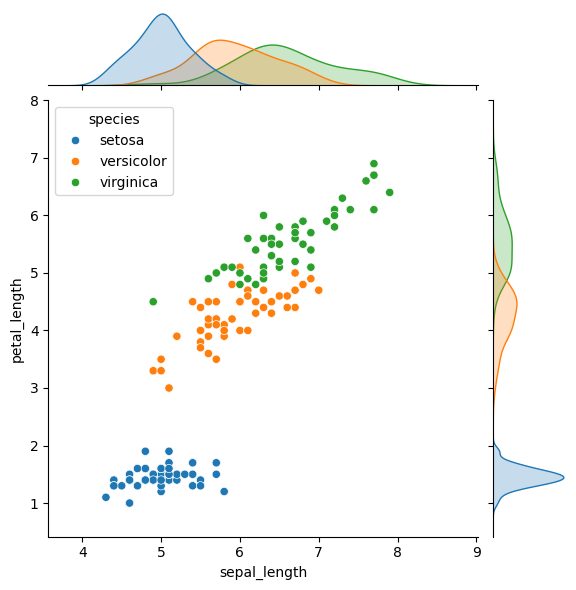

In [17]:
# joint plot //http://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot(data=iris, x = 'sepal_length', y = 'petal_length', hue = 'species')

<Axes: xlabel='species', ylabel='sepal_length'>

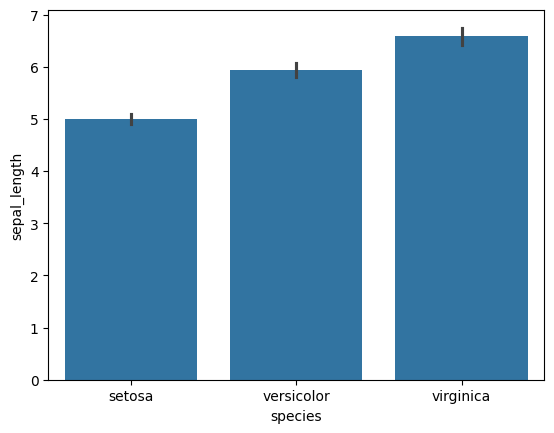

In [18]:
#Diagrama de Barras (Barplot)  https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x = 'species', y = 'sepal_length', data = iris)

<Axes: xlabel='species', ylabel='petal_length'>

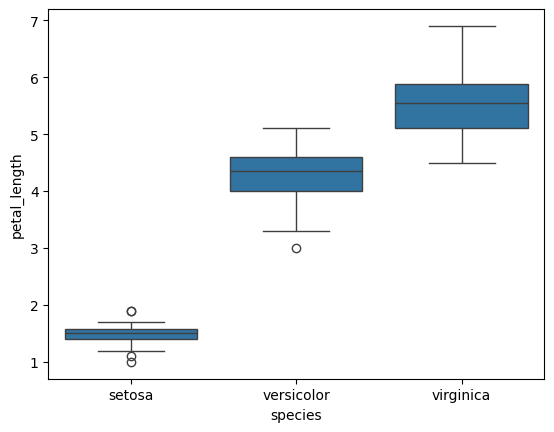

In [19]:
# box plot Diagrama de caja y bigotes //https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x = 'species', y = 'petal_length', data = iris)

# Inferencia estadística: intervalos de confianza

Enfoquémonos ahora en una sola especie. La Iris Versicolor.

Para nuestro ejemplo, tomaremos la variable (sepal_length) que es el largo del sépalo. Hacemos una consulta (query) al dataset.

In [21]:
versicolor_sepal_length = iris.query('species == "versicolor"')['sepal_length']
print(versicolor_sepal_length)


50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, dtype: float64


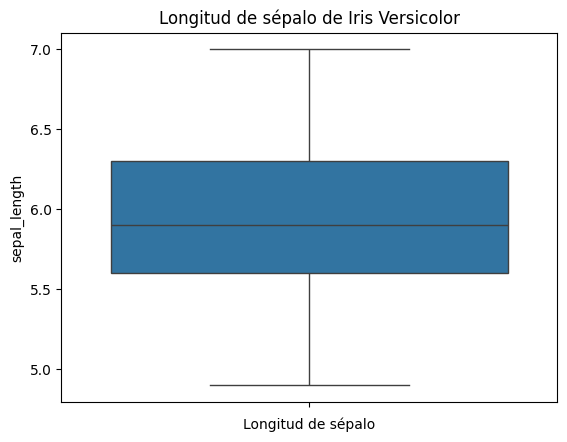

,sepal_length
count,50.000000
mean,5.936000
std,0.516171
min,4.900000
25%,5.600000
50%,5.900000
75%,6.300000
max,7.000000


In [22]:
#Obtengamos los estadísticos descriptivos, tanto en gráficas como en números.
#Distribución
sns.boxplot(versicolor_sepal_length)
plt.xlabel('Longitud de sépalo')
plt.title('Longitud de sépalo de Iris Versicolor')
plt.show()
versicolor_sepal_length.describe()

Ahora usaremos la media como estadístico y procedemos a buscar su valor en la población total. Para ello, emplearemos una técnica de remuestreo llamada **Bootstrapping**.

> **Bootstrapping**: Consiste en escoger valores aleatorios de la muestra y reemplazarlos, creando nuevos arreglos(arrays). A estos nuevos arreglos se les aplica el estadístico que estamos buscando (la media en nuestro caso).

In [23]:
def bootstrap_replicate_1d(data, func): # Genera réplicas de bootstrap de una muestra.
  """Generar réplicas de datos 1D."""
  bs_sample = np.random.choice(data, len(data))
  return func(bs_sample)

def draw_bs_reps(data, func, size=1): # Obtiene réplicas de bootstrap para realizar inferencia.
  """Obtener réplicas con bootstrap."""
  # Inicializar un array de réplicas: bs_replicates
  bs_replicates = np.empty(size)
    # Generar réplicas
  for i in range(size):
      bs_replicates[i] = bootstrap_replicate_1d(data, func)
  return bs_replicates

**Bootstrapping** → Usar datos remuestreados para generar inferencia estadística.

**Muestra de bootstrap** → Un array remuestreado (simulado) de los datos reales.

**Réplica de bootstrap** → Un estadístico obtenido de una muestra de bootstrap.

Con esto, procedemos a “repetir el experimento” de recoger datos sobre Iris Versicolor 10000 veces y luego computar la media.

In [24]:
vers_replicates = draw_bs_reps(versicolor_sepal_length.values, np.mean, size=1000000)
print(versicolor_sepal_length.mean())
print(len(vers_replicates))
vers_replicates.mean()

5.936
1000000


5.935964902

Esto nos devuelve un arreglo de las medias calculadas de cada muestra simulada. Es decir, simulamos una muestra y a cada una de esta se le calcula la media. De este arreglo definimos un **intervalo de confianza del 95%**.

In [25]:
ci = np.percentile(vers_replicates, [2.5, 97.5])
print(ci)

[5.794 6.078]


# **¿Cómo interpretamos los intervalos de confianza?**

Si volviéramos a tomar las medidas de la longitud de sépalo de Iris Versicolor hay un **95% de probabilidad** de que su media esté entre 5.792 mm y 6.08 mm.

Por lo que podríamos decir que la media de la población total está entre estos dos valores con una confianza del 95%.

Grafiquemos esto.

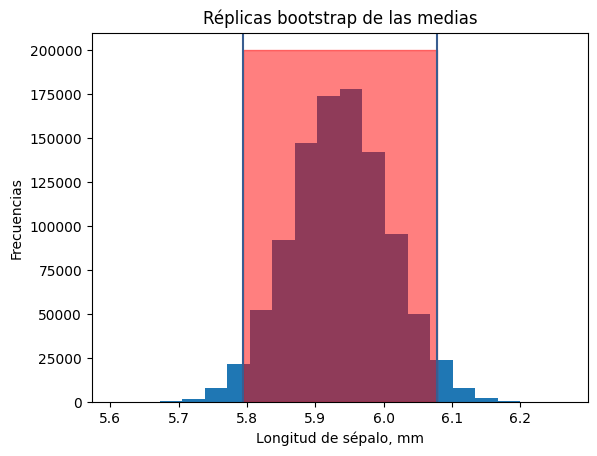

In [26]:
plt.hist(vers_replicates, bins=20)
plt.xlabel('Longitud de sépalo, mm')
plt.ylabel('Frecuencias')
plt.title('Réplicas bootstrap de las medias')
plt.axvline(x=ci[0], color='#395d90')
plt.axvline(x=ci[1], color='#395d90')
plt.fill_between([ci[0], ci[1]], 200000, color='red', alpha=0.5)
plt.show()

Hemos graficado la distribución de las medias de los datos simulados. El área sombreada es el intervalo de confianza, donde muy probablemente (95%) esté la media, si volviéramos a repetir la toma de datos.

¡Esto es una simulación computacional para inferir las características (*media*) de una población!

**Recuerde que se puede hacer lo mismo para otro estadístico como el valor máximo, desviación estándar o valor mínimo.**

# **Prueba de hipótesis**

Miremos las distribuciones de sepal_length para las 3 especies. Enfoquémonos en la media de sepal_length de las especies Versicolor y Virginica. ¡Son diferentes!


<Axes: xlabel='species'>

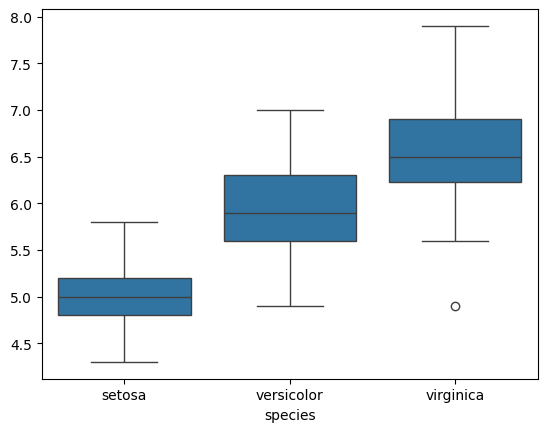

In [ ]:
#Ver la distribucion de los datos de las 3 especies
sns.boxplot(x = 'species', y = iris.sepal_length.values, data = iris)

Como ya te lo estarás imaginando, no es del todo correcto concluir que el **promedio del largo de sépalo Virginica es mayor que el largo de sépalo de Versicolor**, porque esto es solo una muestra y los resultados pudieron ser **solo por casualidad**.


Por lo tanto, realizaremos un ejercicio de **prueba de hipótesis** usando Bootstrapping. Vamos a probar estadísticamente que esto no es pura coincidencia.

# Conceptos:
**Hipótesis nula** → Es que la diferencia observada se debe únicamente al azar.

**Estadístico de prueba** → Un número computado a partir de los datos observados y de los datos simulados. Es para hacer una comparación.

**Significancia estadística** → Cuando hacemos una prueba de hipótesis, buscamos significancia estadística para aceptar o rechazar. Un resultado tiene significancia estadística cuando este tiene poca probabilidad de haber ocurrido dada la hipótesis nula. Para esto usamos el *valor p*.

**Valor p** → Es la probabilidad de obtener un valor que sea al menos tan extremo como el observado, considerando que la hipótesis nula sea verdadera.

* Para que exista significancia, el valor p debe ser menor que **0.05**, o en otros casos, menor que **0.01**.

# Teniendo esto en cuenta, postulemos nuestra hipótesis nula:

##H0: **No existe diferencia entre el promedio de longitud de sépalo de Virginica y Versicolor.**

* Entonces, realicemos una consulta para extraer los datos que necesitamos.

In [ ]:
versicolor_sepal_length = iris.query('species == "versicolor"')['sepal_length']
print('Longitud sépalo Virginica')
print(versicolor_sepal_length.mean())
print(len(versicolor_sepal_length))
print("\n")
virginica_sepal_length = iris.query('species == "virginica"')['sepal_length']
print('Longitud sépalo Versicolor')
print(virginica_sepal_length.mean())
print(len(virginica_sepal_length))
print("\n")
#Ahora, obtenemos la diferencia entre las medias observadas.
observed_diffs_means = np.mean(virginica_sepal_length.values) - np.mean(versicolor_sepal_length.values)
print('Diferencia entre las medias observadas')
print(observed_diffs_means)

Longitud sépalo Virginica
5.936
50


Longitud sépalo Versicolor
6.587999999999998
50


Diferencia entre las medias observadas
0.6519999999999984


El siguiente paso es mover ambos arreglos para que tengan la misma media, **dado que estamos simulando una hipótesis donde sus medias son iguales**.

Para esto:

* Concatenamos los arreglos y obtenemos su media.
* Extraemos la media propia del array y agregamos la media de los datos concatenados.

In [ ]:
versicolor_virginica_concatenated = np.concatenate((versicolor_sepal_length.values, virginica_sepal_length.values))
mean_length = np.mean(versicolor_virginica_concatenated)
print(mean_length)
versicolor_shifted = versicolor_sepal_length.values - np.mean(versicolor_sepal_length.values) + mean_length
virginica_shifted = virginica_sepal_length.values - np.mean(virginica_sepal_length.values) + mean_length
print(versicolor_shifted.mean())
print(virginica_shifted.mean())

6.2620000000000005
6.2620000000000005
6.262000000000004


In [ ]:
#Simulamos 100000 muestras para ambos arreglos a las que les computamos la media.
bs_replicates_versicolor = draw_bs_reps(versicolor_shifted, np.mean, size=100000)
bs_replicates_virginica = draw_bs_reps(virginica_shifted, np.mean, size=100000)

In [ ]:
#Calculamos el estadístico de prueba que es la diferencia de medias:
bs_replicates = bs_replicates_virginica - bs_replicates_versicolor
bs_replicates

array([ 0.052,  0.094,  0.134, ...,  0.12 ,  0.06 , -0.07 ])

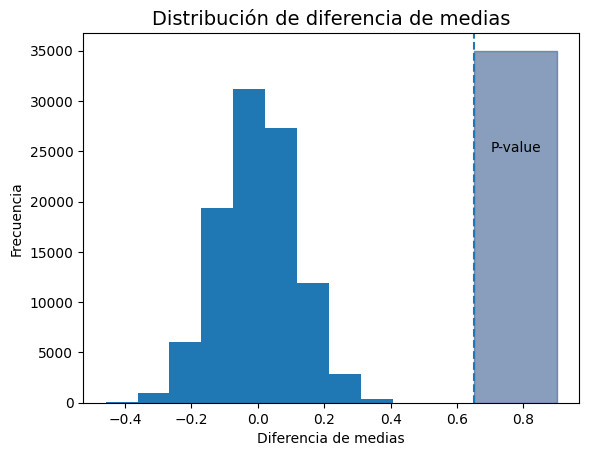

In [ ]:
#Procedemos a graficar la distribución de diferencia de medias, así como el valor p que corresponde a la diferencia de medias de los datos observados.
plt.hist(bs_replicates)
plt.axvline(x=observed_diffs_means, linestyle='--')
plt.fill_between([observed_diffs_means, 0.9], 35000, color='#395d90', alpha=0.6)
plt.text(0.7, 25000, 'P-value')
plt.title('Distribución de diferencia de medias', size=14)
plt.ylabel('Frecuencia')
plt.xlabel('Diferencia de medias')
plt.show()

In [ ]:
#El valor p se ubica en el extremo derecho de nuestra distribución. Lo calculamos y sacamos una conclusión a partir de esto.
p = np.sum(bs_replicates >= observed_diffs_means) / 100000
print(p)


0.0


¡Obtenemos un valor **p igual a 0**!

Esto es valor **p < 0.005** lo que nos da significancia para no aceptar la hipótesis de que no existe diferencia entre el promedio de longitud de sépalo de Virginica y Versicolor.

# **Por lo tanto, las diferencias observadas no son debidas al azar.**